In [1]:
import os, sys
sys.path.append(os.path.dirname(sys.path[0]))
import torch

from utils_deepECpr.algo_utils import *
from algorithms.deepECpr_algo import *
from utils_deepECpr.measurement_utils import *

/home/shastri.19/anaconda3/envs/DPS5/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Options

# Diffusion model related
model_config_location = "configs/model_config.yaml"
diffusion_config_location = "configs/diffusion_config.yaml"

# test data related
data_config_location = "configs/testdata_config.yaml"
image_number = 19 

# measurement related
measurement_type = "OSF" # this particular file is for OSF demo only; Results corresponds to the OSF demo
alpha = 8 # shot-noise level 

# HIO related
pre_run_HIO_file_location = '/local/storage/deepECpr_gitHub_data_files/HIO_pre_run/FFHQ_OSF_HIO_pre_run.npz' # HIO was run on the same measurement data following the procedure mentioned in the paper and the results were saved in a file
HIO_dict = np.load(pre_run_HIO_file_location)
HIO_recon_channel_corrected_using_correlation_combined = HIO_dict['HIO_recon_channel_corrected_using_correlation_combined'] # this has been flipped and rotated to align with channels and not with ground truth

# deepECpr related
damp_bar1 = 0.3
damp_bar2 = 0.075
EM_iteration_stop = 3
total_iterations = 200
std_input = 120/np.sqrt(2) # this is the standard deviation of the initialization noise # ./np.sqrt(2) becasue the input is complex
linear_tune = 0.15 # denoiser factor


In [3]:
# Get measurement

y, sig, x0, z0, _ = get_FFHQ_measurement(image_number, measurement_type, alpha, data_config_location, verbose = True)


Chosen Options 
 
Image Number      :  19
Measurement Type  :  OSF
Alpha             :  8
 


-------------------------------------------
FINAL PSNR deepECpr :  37.14474958872901
-------------------------------------------


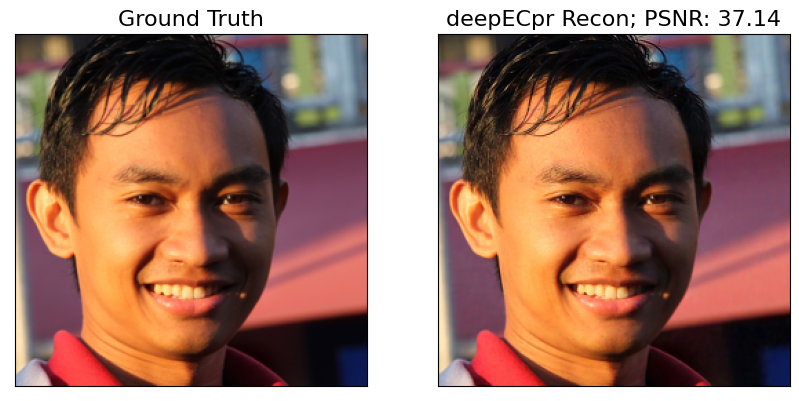

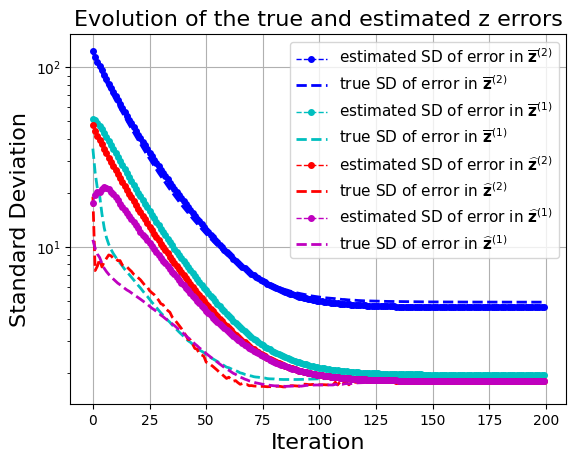

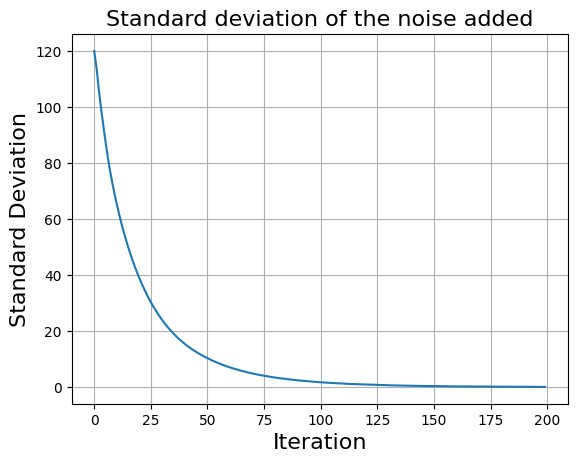

In [4]:
# OSF deepECpr image initialization using HIO

alpha_count = {4: 0, 6: 1}.get(alpha, 2)
alg_run = 0 # we choose the 0th run of the three runs
x_hat_HIO_init = torch.zeros_like(x0)
x_hat_HIO_init[0,0,:,:,:] = torch.from_numpy(HIO_recon_channel_corrected_using_correlation_combined[image_number,alg_run,alpha_count,:,:,:])

# Run deepECpr  

deepECpr_recon = run_deepECpr_OSF_for_demo(y, sig, x0, z0, model_config_location, diffusion_config_location, damp_bar1, damp_bar2, EM_iteration_stop, total_iterations, std_input, linear_tune, x_hat_HIO_init, verbose = False, my_device = 'cuda:0')